In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv('df/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Feature scaling

In [3]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
df['age_scaled']=scaler.fit_transform(df['Age'].values.reshape(-1,1))
df['salary_scaled']=scaler.fit_transform(df['EstimatedSalary'].values.reshape(-1,1))

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,age_scaled,salary_scaled
0,15624510,Male,19,19000,0,-1.781797,-1.490046
1,15810944,Male,35,20000,0,-0.253587,-1.460681
2,15668575,Female,26,43000,0,-1.113206,-0.785290
3,15603246,Female,27,57000,0,-1.017692,-0.374182
4,15804002,Male,19,76000,0,-1.781797,0.183751


#### feature encoding

In [4]:
dfx=  pd.get_dummies(df['Gender'],prefix='gender')
dfx.head()

,gender_Female,gender_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [5]:
df1= pd.concat((df,dfx),axis=1)
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,age_scaled,salary_scaled,gender_Female,gender_Male
0,15624510,Male,19,19000,0,-1.781797,-1.490046,0,1
1,15810944,Male,35,20000,0,-0.253587,-1.460681,0,1
2,15668575,Female,26,43000,0,-1.113206,-0.785290,1,0
3,15603246,Female,27,57000,0,-1.017692,-0.374182,1,0
4,15804002,Male,19,76000,0,-1.781797,0.183751,0,1


#### dropping columns

In [6]:
df= df1.iloc[:,4:]
df.head()

,Purchased,age_scaled,salary_scaled,gender_Female,gender_Male
0,0,-1.781797,-1.490046,0,1
1,0,-0.253587,-1.460681,0,1
2,0,-1.113206,-0.785290,1,0
3,0,-1.017692,-0.374182,1,0
4,0,-1.781797,0.183751,0,1


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape

((320, 4), (80, 4))

In [8]:
X_train.head()

,age_scaled,salary_scaled,gender_Female,gender_Male
3,-1.017692,-0.374182,1,0
18,0.797057,-1.225763,0,1
202,0.128465,1.886912,1,0
250,0.606031,-0.902749,1,0
274,1.847701,-1.284492,1,0


In [9]:
y_train.head()

3      0
18     1
202    1
250    0
274    1
Name: Purchased, dtype: int64

In [10]:
from sklearn.svm import SVC


# All kernals - Linear Kernel. Polynomial Kernel. Gaussian Radial Basis Function (RBF). Sigmoid Kernel.

In [11]:
def model(kernel_name, c):
    model = SVC(C=c, kernel=kernel_name)
    model.fit(X_train, y_train)
    print(model.fit(X_train,y_train))
    
    y_pred = model.predict(X_test)
    print(y_pred)
    
    cwd=str(c)
    
    c_withoutDots = cwd.replace(".", "_")
    
    # Prompt user to enter variable name
    acc_name = kernel_name+c_withoutDots
    # Assign value to variable with the entered name
    acc = accuracy_score(y_test, y_pred)

    # Assign the value of the new variable to the variable with the entered name
    globals()[acc_name] = acc

    # Print the value of the variable with the entered name
    print("{0}accuracy = {1}".format("\033[1m" + acc_name.replace('_','.') + "\033[0m ", globals()[acc_name]))

    
kernel_names = ['linear', 'poly', 'rbf', 'sigmoid']
c_values = [0.1, 0.01, 5.0, 10.0]

for kernel_name in kernel_names:
    for c in c_values:
        print(f"Kernel name: {kernel_name}, C value: {c}")
        model(kernel_name, c)
        print()  # add a blank line after each iteration of the outer loop


Kernel name: linear, C value: 0.1
SVC(C=0.1, kernel='linear')
[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0]
linear0.1 accuracy = 0.875

Kernel name: linear, C value: 0.01
SVC(C=0.01, kernel='linear')
[0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0]
linear0.01 accuracy = 0.825

Kernel name: linear, C value: 5.0
SVC(C=5.0, kernel='linear')
[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0]
linear5.0 accuracy = 0.8625

Kernel name: linear, C value: 10.0
SVC(C=10.0, kernel='linear')
[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0]
linear

# DF

In [12]:
# Define data for the DataFrame
linear_data = [linear0_1, linear0_01, linear5_0, linear10_0]
poly_data = [poly0_1, poly0_01, poly5_0, poly10_0]
rbf_data = [rbf0_1, rbf0_01, rbf5_0, rbf10_0]
sigmoid_data = [sigmoid0_1, sigmoid0_01, sigmoid5_0, sigmoid10_0]

# Create a dictionary with column names as keys and data as values
data_dict = {
    "Linear Kernel": linear_data,
    "Polynomial Kernel": poly_data,
    "Radial Basis Function (RBF) Kernel": rbf_data,
    "Sigmoid Kernel": sigmoid_data
}

# Create a DataFrame from the dictionary, with index values 0.1, 0.01, 5, and 10
df = pd.DataFrame(data_dict, index=[0.1, 0.01, 5, 10])

# Print the DataFrame
df

,Linear Kernel,Polynomial Kernel,Radial Basis Function (RBF) Kernel,Sigmoid Kernel
0.10,0.8750,0.8625,0.925,0.8125
0.01,0.8250,0.7750,0.650,0.6500
5.00,0.8625,0.9250,0.925,0.7500
10.00,0.8625,0.9250,0.925,0.7500


In [13]:
print(df.idxmax())
df.max()

Linear Kernel                         0.1
Polynomial Kernel                     5.0
Radial Basis Function (RBF) Kernel    0.1
Sigmoid Kernel                        0.1
dtype: float64


Linear Kernel                         0.8750
Polynomial Kernel                     0.9250
Radial Basis Function (RBF) Kernel    0.9250
Sigmoid Kernel                        0.8125
dtype: float64

In [14]:
# get the index of the maximum value
index = df.stack().idxmax()

# get the maximum value
max_value = df.stack().max()

# print the index and the value
print(f"Index: {index}")
print(f"Value: {max_value}")


Index: (0.1, 'Radial Basis Function (RBF) Kernel')
Value: 0.925


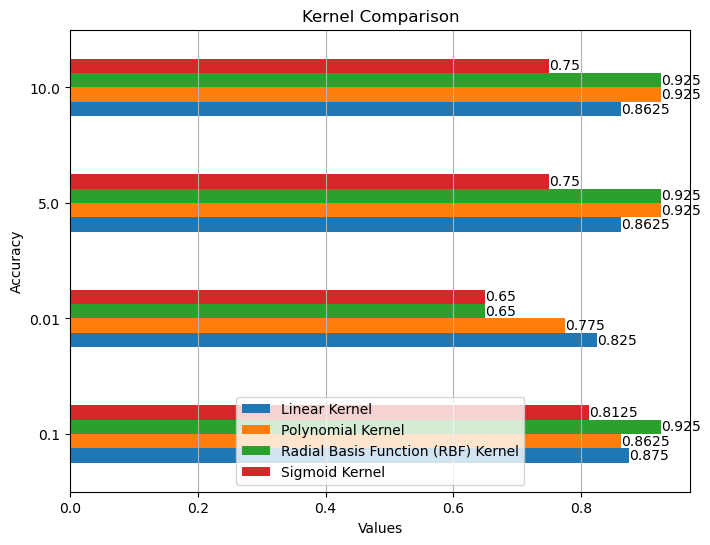

In [15]:
ax = df.plot(kind='barh', figsize=(8, 6), rot=0)

# show the grid lines
ax.grid(True, axis='x')

# show the values on the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.title('Kernel Comparison')
plt.xlabel('Values')
plt.ylabel('Accuracy')
plt.legend(loc='lower center')
plt.show()